# 第3章 神经网络的Tensorflow实现 (20210304-20210306)

## 3.1 神经网络的数据结构 

张量可以理解为n维数组或矩阵，根据维数的不同，张量又可以分为标量、向量、矩阵、3D张量及更高维张量。

In [1]:
import numpy as np
x = np.array(888)
print(x)
print(x.ndim)

888
0


In [2]:
x = np.array([1,2,3,4,5])
print(x)
print(x.ndim)

[1 2 3 4 5]
1


In [3]:
x = np.array([[1,2,3,4],
              [5,6,7,8],
              [9,6,7,4]])
print(x)
print(x.ndim)

[[1 2 3 4]
 [5 6 7 8]
 [9 6 7 4]]
2


In [4]:
x = np.array([[[12,4,6,8,23],
              [45,1,2,6,67]],
              [[32,7,3,5,14],
              [56,1,2,8,18]],
              [[23,7,2,5,78],
              [14,2,7,2,15]]])
print(x)
print(x.ndim)

[[[12  4  6  8 23]
  [45  1  2  6 67]]

 [[32  7  3  5 14]
  [56  1  2  8 18]]

 [[23  7  2  5 78]
  [14  2  7  2 15]]]
3


- 标量是仅包含一个数字的张量，又称零维张量（0D张量）
- 向量是由数字组成的数组，也称为一维张量（1D张量）
- 矩阵是由向量组成的数组，也称为二维张量（2D张量）
- 3D张量是由多个矩阵组成的数组，将多个3D张量组合成一个数组，就可以创建4D张量

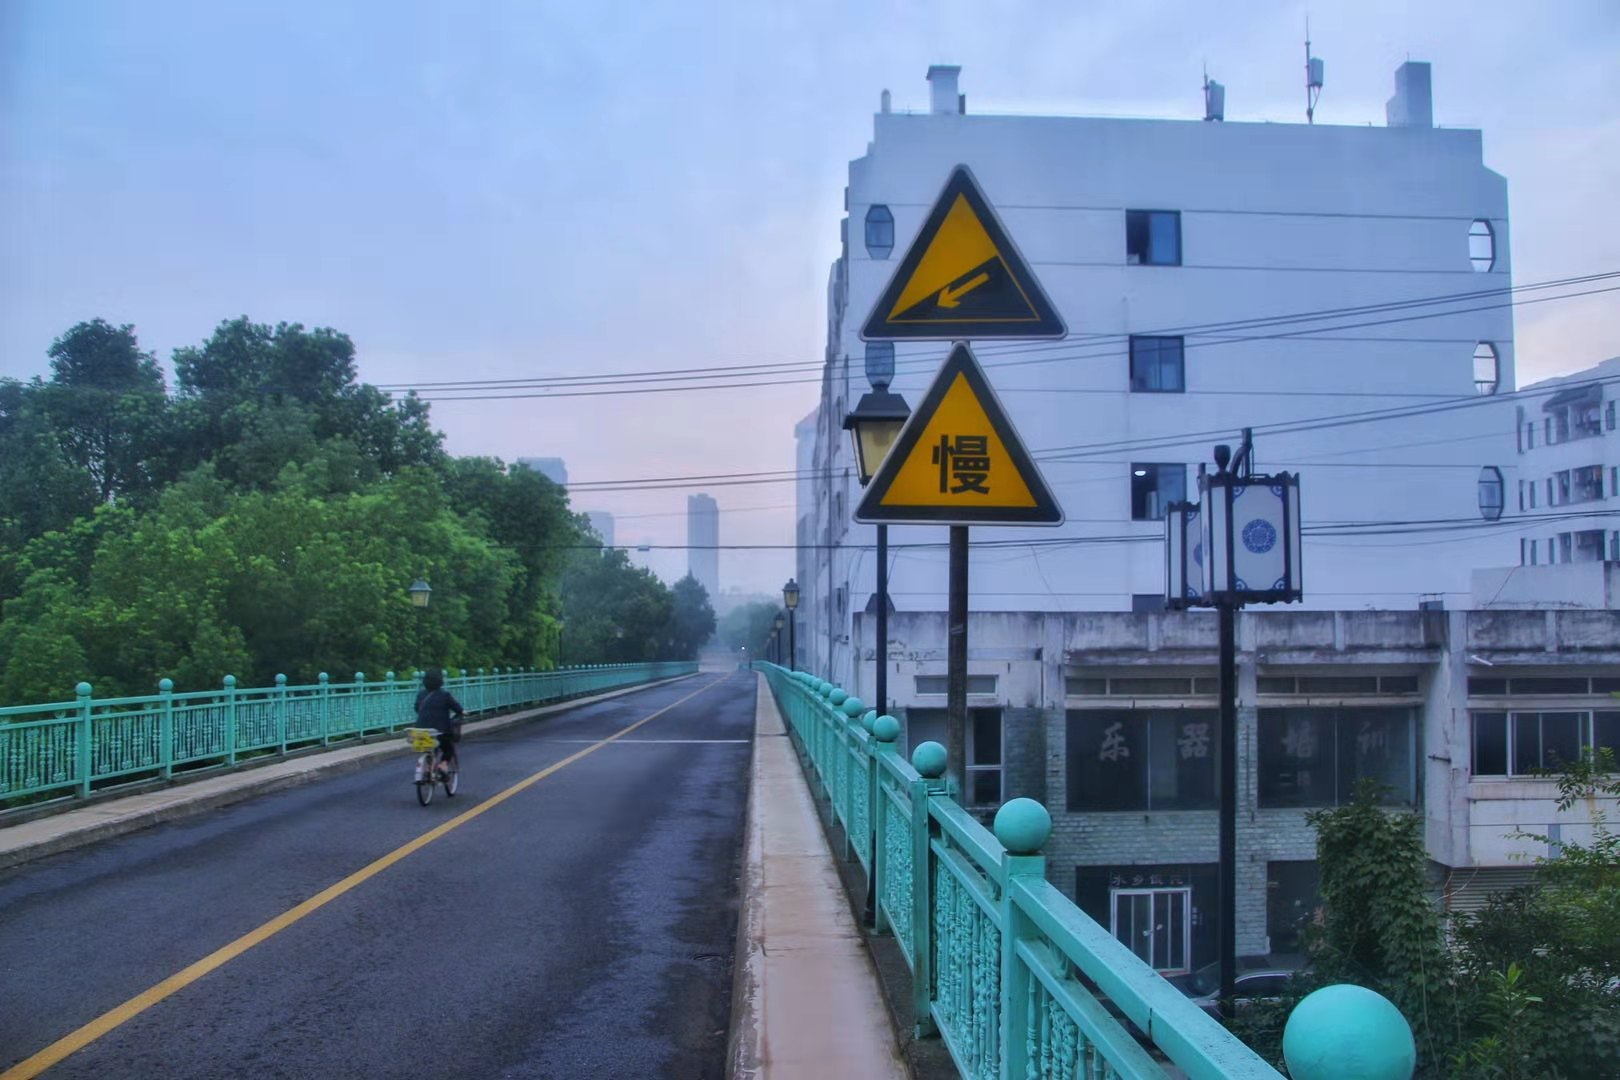

In [5]:
from PIL import Image
photo = Image.open(r'C:\Users\leozhou\Desktop\图片\微信图片_20210111140813.jpg')
photo

In [6]:
print(photo.size)

(1620, 1080)


(405, 270)


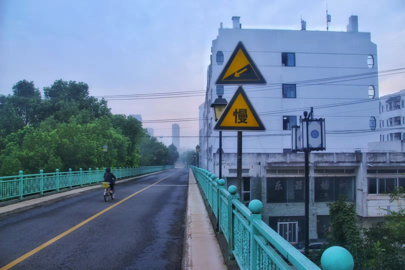

In [7]:
photo2 = photo.resize([405,270])
print(photo2.size)
photo2

将图像数据通过.array函数转换为矩阵形式

In [8]:
Im  = np.array(photo)
print(Im.shape)
Im[:,:,0]

(1080, 1620, 3)


array([[114, 114, 114, ..., 150, 150, 149],
       [114, 114, 114, ..., 150, 150, 149],
       [115, 115, 115, ..., 150, 150, 149],
       ...,
       [113, 117, 124, ...,  26,  23,  20],
       [117, 121, 127, ...,  37,  34,  29],
       [125, 125, 128, ...,  38,  37,  31]], dtype=uint8)

In [9]:
Im = Im/255
print(Im[:,:,0])

[[0.44705882 0.44705882 0.44705882 ... 0.58823529 0.58823529 0.58431373]
 [0.44705882 0.44705882 0.44705882 ... 0.58823529 0.58823529 0.58431373]
 [0.45098039 0.45098039 0.45098039 ... 0.58823529 0.58823529 0.58431373]
 ...
 [0.44313725 0.45882353 0.48627451 ... 0.10196078 0.09019608 0.07843137]
 [0.45882353 0.4745098  0.49803922 ... 0.14509804 0.13333333 0.11372549]
 [0.49019608 0.49019608 0.50196078 ... 0.14901961 0.14509804 0.12156863]]


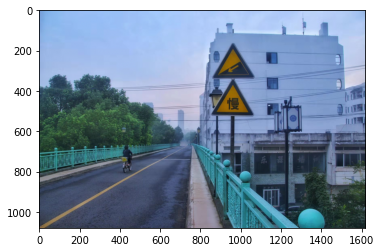

In [10]:
import matplotlib.pyplot as plt
plt.imshow(Im)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

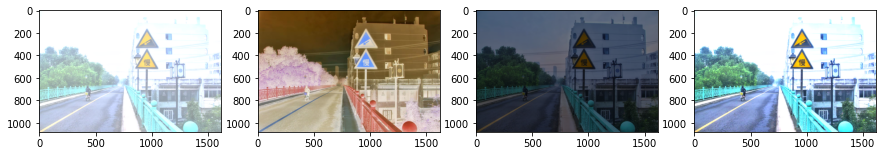

In [11]:
Im1 = Im+0.5
Im2 = 1-Im
Im3 = 0.5*Im
Im4 = 2*Im
plt.figure()
fig,ax = plt.subplots(1,4)
fig.set_figwidth(15)
ax[0].imshow(Im1)
ax[1].imshow(Im2)
ax[2].imshow(Im3)
ax[3].imshow(Im4)

In [12]:
import pandas as pd 
MasterFile = pd.read_csv(r'D:\datasets\深度学习王汉生\FoodScore.csv')
print(MasterFile.shape)
MasterFile.head()

(196, 2)


,ID,score
0,pic1,2.750333
1,pic2,2.962092
2,pic3,3.459351
3,pic4,2.246845
4,pic5,2.609172


array([[<AxesSubplot:title={'center':'score'}>]], dtype=object)

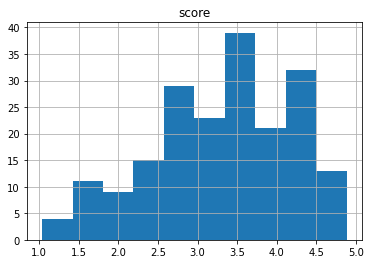

In [13]:
MasterFile.hist()

- 分离因变量Y

In [14]:
FileNames = MasterFile['ID']
N = len(FileNames)
Y = np.array(MasterFile['score']).reshape(N,1)
N

196

- 准备数据

In [15]:
from PIL import Image
IMSIZE = 128
X = np.zeros([N,IMSIZE,IMSIZE,3])
for i in range(N):
    MyFile = FileNames[i]
    Im = Image.open('D:/datasets/\深度学习王汉生/data_foodscore/'+MyFile+'.jpg')
    Im = Im.resize([IMSIZE,IMSIZE])
    Im = np.array(Im)/255
    X[i,] = Im

- 数据展示

e:\software\miniconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


<Figure size 432x288 with 0 Axes>

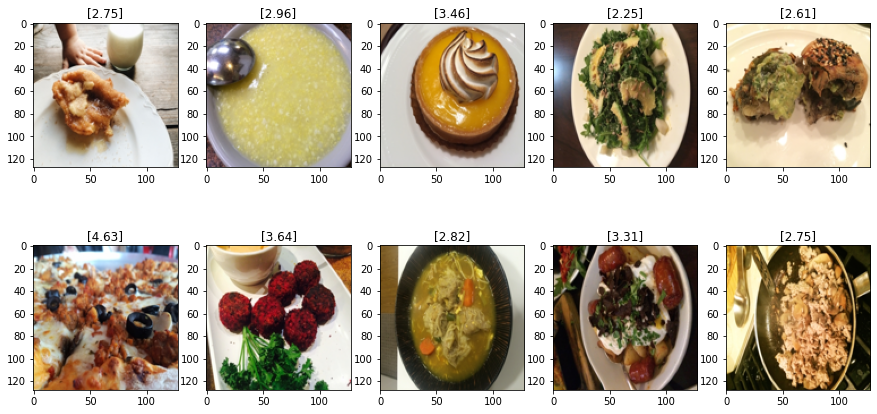

In [16]:
plt.figure()
fig,ax = plt.subplots(2,5)
fig.set_figheight(7.5)
fig.set_figwidth(15)
ax = ax.flatten()                                      #flatten()函数将ax拉直，拉直后的ax是一个长度为10的数组
for i in range(10):
    ax[i].imshow(X[i,:,:,:])
    ax[i].set_title(np.round(Y[i],2))

- 划分训练集和测试集

In [17]:
from sklearn.model_selection import train_test_split
X0,X1,Y0,Y1 = train_test_split(X,Y,test_size=0.5,random_state=0)

In [18]:
X0.shape

(98, 128, 128, 3)

In [19]:
Y0.shape

(98, 1)

- 线性回归模型构建

In [20]:
from keras.layers import Dense, Flatten, Input
from keras import Model
input_layer = Input([IMSIZE,IMSIZE,3])
x = input_layer
x = Flatten()(x)
x = Dense(1)(x)
output_layer = x
model = Model(input_layer,output_layer)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
flatten (Flatten)            (None, 49152)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 49153     
Total params: 49,153
Trainable params: 49,153
Non-trainable params: 0
_________________________________________________________________


- 模型编译

模型构建好之后就是模型训练，在Keras中通过编译实现，该步骤涉及以下三个参数：
- 损失函数（Loss Function）：即模型如何衡量在训练数据集上的性能
- 优化器（optimizer）：基于训练数据和损失数据更新网络的机制
- 指标（Metric）:在训练和测试过程中需要监控的指标，本案例使用残差平方和MSE

In [21]:
from keras.optimizers import Adam
model.compile(loss = 'mse',optimizer = Adam(lr = 0.001), metrics = ['mse'])

- 模型拟合
最后用model.fit验证模型的外样本精度

In [22]:
# model_linaer = model.fit(X0,Y0,validation_data = (X1,Y1),batch_size=100, epochs=100) 报错
model_1 = model.fit(X0,Y0,
          validation_data=(X1,Y1),             # 此处报错，中括号改为小括号
          batch_size=100,
          epochs=100) 

Epoch 1/100


InternalError:  Blas GEMV launch failed:  m=49152, n=98
	 [[node functional_1/dense/MatMul (defined at <ipython-input-22-0805af8c6a03>:5) ]] [Op:__inference_train_function_518]

Function call stack:
train_function


- 模型预测

In [ ]:
MyPic = Image.open('D:/datasets/深度学习王汉生/data_foodscore/beijingduck.jpg')
MyPic

In [ ]:
MyPic = MyPic.resize((IMSIZE,IMSIZE))
MyPic = np.array(MyPic)/255
MyPic

In [ ]:
plt.imshow(MyPic)

In [ ]:
MyPic = MyPic.reshape((1,IMSIZE,IMSIZE,3))
model.predict(MyPic)

## 3.4 逻辑回归模型的Tensorflow实现 

处理二分类问题时，最常用的就是逻辑回归模型；当二分类问题变成了多分类问题时，逻辑回归就变成了Softmax回归。

对于一个二分类问题，因变量$y=0/1$,其中1表示正例，0表示负例，则逻辑回归的数学表达式如下：

$$P(Y_{i}=1|X_{i},\beta) = \frac{\exp(X_{i}^{T}\beta)}{1+\exp(X_{i}^{T}\beta)} \tag{3.1} $$

直观解释，对于第i个样本，给定输入$X_i$和参数$\beta$，它的标签$Y_i = 1$的概率

- Softmax回归模型

Softmax处理多分类问题，Softmax函数表达式如下：

$$y_k = \frac{\exp(a_k)}{\sum\limits_{i=1}^{n}\exp(a_i)}\tag{3.2}$$

Softmax回归的数学表达式：

$$P(Y_i=j|X_i,\beta) = \frac{\exp(X_i^T\beta_j)}{\sum\limits_{k=1}^K\exp(X_i^T\beta_k)}\tag{3.3}$$

案例：**手写数字识别** 导入MNIST数据

In [ ]:
# 已经废弃
# from tensorflow.examples.tutorials.mnist import input_data
# data = input_data.read_data_sets("data/MNIST/",one_hot = False)

In [ ]:
#代码示例：3-21
from tensorflow import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

- 准备训练数据和测试数据

In [ ]:
X0 = x_train
Y0 = y_train
X1 = x_test
Y1 = y_test
print(X0.shape)

Tensorflow将原始图像的像素矩阵直接拉直成了长度为784的向量

- 手写数字展示

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
fig,ax = plt.subplots(2,5)
ax = ax.flatten()
for i in range(10):
    Im = X0[Y0 == i][0].reshape(28,28)
    ax[i].imshow(Im)
plt.show()

- 产生one-hot型因变量

In [ ]:
X0

In [ ]:
X0.shape

In [ ]:
Y0

In [ ]:
Y0.shape

- 为了符合tensorflow的建模要求，需要将数据转换为one-hot编码形式

In [ ]:
from keras.utils import to_categorical
YY0 = to_categorical(Y0)            
YY1 = to_categorical(Y1)                         #将因变量处理成one-hot表示,编码

In [ ]:
YY0

In [ ]:
YY0.shape

- 构建逻辑回归模型

In [ ]:
from keras.layers import Activation,Dense,Flatten,Input
from keras import Model

input_shape = (784,)
input_layer = Input(input_shape)
x = input_layer
x = Dense(10)(x)
x = Activation('softmax')(x)
output_layer = x
model = Model(input_layer,output_layer)

In [ ]:
model.summary()

- 模型编译

逻辑回归的编译：
- 损失函数不是MSE，而是对数似然函数（交叉熵损失函数），在tf框架下，这个损失函数称为catagorial_crossentropy
- 多元分类问题优化的目标是对数似然函数，监控的目标是精度，metrics=accuracy

(线性回归优化和监控的目标是统一的，都为MSE)

In [ ]:
from keras.optimizers import Adam
model.compile(optimizer = Adam(0.01),loss = 'categorical_crossentropy', metrics = ['accuracy'])

- 模型拟合

???

In [ ]:
# model.fit(X0,YY0,
#           validation_data=(X1,YY1),
#           batch_size=1000,
#           epochs=10)
model_2 = model.fit(X0,YY0,                                      
                    validation_data=(X1,YY1),
                    batch_size=1000,                             
                    epochs=10)

- 模型参数结果可视化

In [ ]:
model.layers

获得Dense层的多数估计结果

In [ ]:
model.layers[1].get_weights()

查看参数矩阵的维度

In [ ]:
model.layers[1].get_weights()[0].shape

将参数结果**可视化**

In [ ]:
plt.figure()
fig,ax = plt.subplots(2,5)
ax = ax.flatten()
weights = model.layers[1].get_weights()[0]
for i in range(10):
    Im = weights[:,i].reshape((28,28))
    ax[i].imshow(Im, cmap='seismic')
    ax[i].set_title('{}'.format(i))
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()